In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing




In [3]:
data = pd.read_csv("heart.csv")


In [4]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
#Age: age of the patient [years]

#Sex: sex of the patient [M: Male, F: Female]

#ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

#RestingBP: resting blood pressure [mm Hg]

#Cholesterol: serum cholesterol [mm/dl]

#FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

#RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

#MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

#ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

#Oldpeak: oldpeak = ST [Numeric value measured in depression]

#ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

#HeartDisease: output class [1: heart disease, 0: Normal]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.mean()

Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64

In [8]:
data.shape

(918, 12)

In [9]:
print(data.isnull() .sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# Data visualization and pre-processing

In [78]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

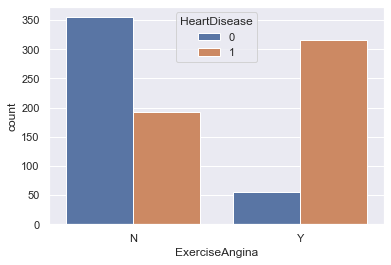

In [79]:
g = sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=data)

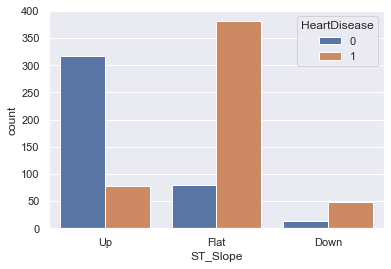

In [80]:
g = sns.countplot(x='ST_Slope', hue='HeartDisease', data=data)

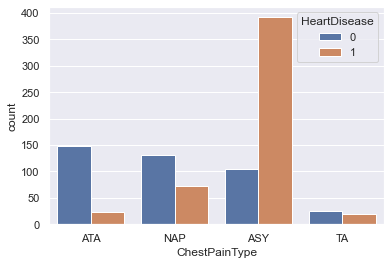

In [81]:
g = sns.countplot(x='ChestPainType', hue='HeartDisease', data=data)

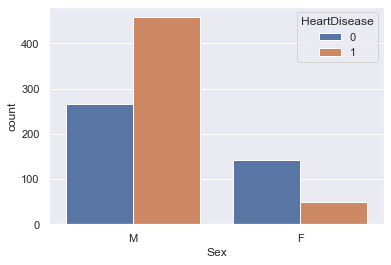

In [82]:
g = sns.countplot(x='Sex', hue='HeartDisease', data=data)

In [83]:
    data.groupby(['Sex'])['HeartDisease'].value_counts(normalize=True)

Sex  HeartDisease
F    0               0.740933
     1               0.259067
M    1               0.631724
     0               0.368276
Name: HeartDisease, dtype: float64

#### 63 % of Male had heartDisease while only 25 % of female


In [84]:
data.groupby(['ChestPainType'])['HeartDisease'].value_counts(normalize=True)

ChestPainType  HeartDisease
ASY            1               0.790323
               0               0.209677
ATA            0               0.861272
               1               0.138728
NAP            0               0.645320
               1               0.354680
TA             0               0.565217
               1               0.434783
Name: HeartDisease, dtype: float64

In [85]:
data.groupby(['RestingECG'])['HeartDisease'].value_counts(normalize=True)

RestingECG  HeartDisease
LVH         1               0.563830
            0               0.436170
Normal      1               0.516304
            0               0.483696
ST          1               0.657303
            0               0.342697
Name: HeartDisease, dtype: float64

In [10]:
data = data.apply(LabelEncoder().fit_transform)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [88]:
abs(data.corr()['HeartDisease'].drop('HeartDisease')).sort_values()

RestingECG        0.057384
RestingBP         0.113658
Cholesterol       0.138663
FastingBS         0.267291
Age               0.282039
Sex               0.305445
ChestPainType     0.386828
MaxHR             0.402627
Oldpeak           0.420282
ExerciseAngina    0.494282
ST_Slope          0.558771
Name: HeartDisease, dtype: float64

In [89]:
#RestingECG is hardly correlated with Death and thus I will remove this feature and train the model

In [90]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(data))
data1 = data[(z<3).all(axis=1)]
data1.shape

(915, 12)

In [109]:
X = data1.drop(['HeartDisease', 'RestingECG'], axis=1)
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,98,0,10,2
1,21,0,2,55,40,0,82,0,20,1
2,9,1,1,31,141,0,25,0,10,2
3,20,0,0,39,72,0,34,1,25,1
4,26,1,2,49,53,0,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,58,0,22,1
914,40,1,0,45,51,1,67,0,42,1
915,29,1,0,31,9,0,41,1,22,1
916,29,0,1,31,94,0,100,0,10,1


In [110]:
y= data1[['HeartDisease']]
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [113]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.43080766,  0.5153253 ,  0.22623091,  0.57786474,  1.11096745,
        -0.55251984,  1.40408044, -0.82208526, -0.87538014,  1.0508477 ],
       [-0.47720608, -1.94052184,  1.27169192,  1.57148183, -0.70953012,
        -0.55251984,  0.76229526, -0.82208526,  0.13289381, -0.60410178],
       [-1.74867485,  0.5153253 ,  0.22623091, -0.13186175,  1.00888348,
        -0.55251984, -1.52406446, -0.82208526, -0.87538014,  1.0508477 ],
       [-0.58316181, -1.94052184, -0.81923011,  0.43591944, -0.16508225,
        -0.55251984, -1.16306029,  1.21641884,  0.63703079, -0.60410178],
       [ 0.05257257,  0.5153253 ,  1.27169192,  1.14564593, -0.48834817,
        -0.55251984, -0.60149826, -0.82208526, -0.87538014,  1.0508477 ]])

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [117]:
from sklearn.metrics import accuracy_score, f1_score

In [124]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [158]:
x_train.shape

(732, 10)

In [159]:
y_train.shape

(549, 1)

In [160]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [161]:
models = {
    "logReg": LogisticRegression(),
    "decTree" : DecisionTreeClassifier(), 
    "knc": KNeighborsClassifier(), 
    "nave": GaussianNB()
}

In [163]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train, y_train)
    print(f'Training Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')  
    print('-'*30)

Using model: logReg
Training Score: 0.8652094717668488
Test Score: 0.8524590163934426
------------------------------
Using model: decTree
Training Score: 1.0
Test Score: 0.8060109289617486
------------------------------
Using model: knc
Training Score: 0.8706739526411658
Test Score: 0.860655737704918
------------------------------
Using model: nave
Training Score: 0.8542805100182149
Test Score: 0.8360655737704918
------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-163-b8c5f092732c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
